In [1]:
import numpy as np
import cv2
import os
from PIL import Image
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

Розмір файлу: 41280 байт
Розмір зображення: (470, 320)


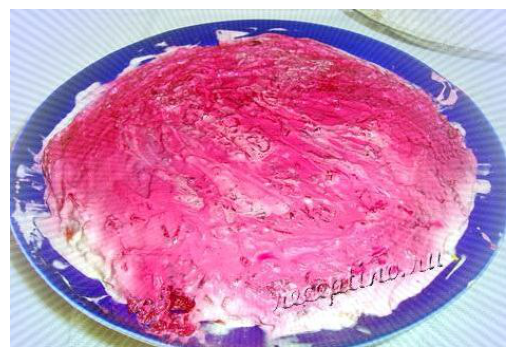

In [9]:
image = Image.open(r'''C:\Users\solov\DZ_61/rec.jpg''')
print(f"Розмір файлу: {os.path.getsize('rec.jpg')} байт")
print(f"Розмір зображення: {image.size}")
plt.axis('off')
plt.imshow(image);

In [19]:
image.save('compressed_rec.jpg', format='JPEG', quality=20, optimize=True)

Розмір файлу: 12593 байт
Розмір зображення: (470, 320)


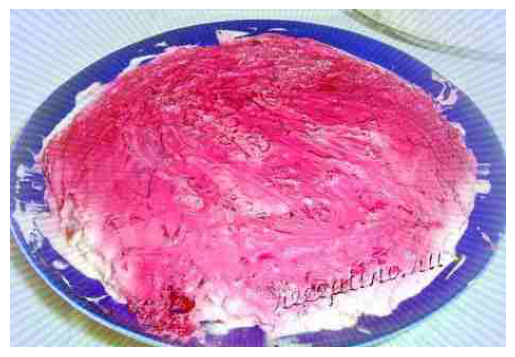

In [22]:
img = Image.open('compressed_rec.jpg')
print(f"Розмір файлу: {os.path.getsize('compressed_rec.jpg')} байт")
print(f"Розмір зображення: {img.size}")
plt.axis('off')
plt.imshow(img);

In [23]:
import gzip

In [24]:
with open('pancake.txt', 'rt') as file_in:
    # Відкриваємо файл, у який буде записано стиснутий текст
    with gzip.open('compressed_pancake.gz', 'wt') as file_out:
        # Стиснутий текст буде записуватися в файл 'compressed_recipe.gz'
        file_out.writelines(file_in)

print('File compression complete.')

File compression complete.


In [25]:
print(f"Розмір початкового файлу: {os.path.getsize('pancake.txt')} байт")
print(f"Розмір стисненого файлу: {os.path.getsize('compressed_pancake.gz')} байт")

Розмір початкового файлу: 591 байт
Розмір стисненого файлу: 429 байт


In [29]:
# Node of a Huffman Tree  
class Nodes:  
    def __init__(self, probability, symbol, left = None, right = None):  
        # probability of the symbol  
        self.probability = probability  
  
        # the symbol  
        self.symbol = symbol  
  
        # the left node  
        self.left = left  
  
        # the right node  
        self.right = right  
  
        # the tree direction (0 or 1)  
        self.code = ''  
  
""" A supporting function in order to calculate the probabilities of symbols in specified data """  
def CalculateProbability(the_data):  
    the_symbols = dict()  
    for item in the_data:  
        if the_symbols.get(item) == None:  
            the_symbols[item] = 1  
        else:   
            the_symbols[item] += 1       
    return the_symbols  
  
""" A supporting function in order to print the codes of symbols by travelling a Huffman Tree """  
the_codes = dict()  
def CalculateCodes(node, value = ''):  
    # a huffman code for current node  
    newValue = value + str(node.code)  
  
    if(node.left):  
        CalculateCodes(node.left, newValue)  
    if(node.right):  
        CalculateCodes(node.right, newValue)  
  
    if(not node.left and not node.right):  
        the_codes[node.symbol] = newValue  
           
    return the_codes  
  
""" A supporting function in order to get the encoded result """  
def OutputEncoded(the_data, coding):  
    encodingOutput = []  
    for element in the_data:  
        # print(coding[element], end = '')  
        encodingOutput.append(coding[element])  
          
    the_string = ''.join([str(item) for item in encodingOutput])      
    return the_string  
          
""" A supporting function in order to calculate the space difference between compressed and non compressed data"""      
def TotalGain(the_data, coding):  
    # total bit space to store the data before compression  
    beforeCompression = len(the_data) * 8  
    afterCompression = 0  
    the_symbols = coding.keys()  
    for symbol in the_symbols:  
        the_count = the_data.count(symbol)  
        # calculating how many bit is required for that symbol in total  
        afterCompression += the_count * len(coding[symbol])  
    print("Space usage before compression (in bits):", beforeCompression)  
    print("Space usage after compression (in bits):",  afterCompression)  
  
def HuffmanEncoding(the_data):  
    symbolWithProbs = CalculateProbability(the_data)  
    the_symbols = symbolWithProbs.keys()  
    the_probabilities = symbolWithProbs.values()  
    print("symbols: ", the_symbols)  
    print("probabilities: ", the_probabilities)  
      
    the_nodes = []  
      
    # converting symbols and probabilities into huffman tree nodes  
    for symbol in the_symbols:  
        the_nodes.append(Nodes(symbolWithProbs.get(symbol), symbol))  
      
    while len(the_nodes) > 1:  
        # sorting all the nodes in ascending order based on their probability  
        the_nodes = sorted(the_nodes, key = lambda x: x.probability)  
        # for node in nodes:    
        #      print(node.symbol, node.prob)  
      
        # picking two smallest nodes  
        right = the_nodes[0]  
        left = the_nodes[1]  
      
        left.code = 0  
        right.code = 1  
      
        # combining the 2 smallest nodes to create new node  
        newNode = Nodes(left.probability + right.probability, left.symbol + right.symbol, left, right)  
      
        the_nodes.remove(left)  
        the_nodes.remove(right)  
        the_nodes.append(newNode)  
              
    huffmanEncoding = CalculateCodes(the_nodes[0])  
    print("symbols with codes", huffmanEncoding)  
    TotalGain(the_data, huffmanEncoding)  
    encodedOutput = OutputEncoded(the_data,huffmanEncoding)  
    return encodedOutput, the_nodes[0]  
   
def HuffmanDecoding(encodedData, huffmanTree):  
    treeHead = huffmanTree  
    decodedOutput = []  
    for x in encodedData:  
        if x == '1':  
            huffmanTree = huffmanTree.right     
        elif x == '0':  
            huffmanTree = huffmanTree.left  
        try:  
            if huffmanTree.left.symbol == None and huffmanTree.right.symbol == None:  
                pass  
        except AttributeError:  
            decodedOutput.append(huffmanTree.symbol)  
            huffmanTree = treeHead  
        string = ''.join([str(item) for item in decodedOutput])  
    return string 

In [30]:
the_data = "We must win this war!"  
print(the_data)  
encoding, the_tree = HuffmanEncoding(the_data)  
print('Encoded output: ', encoding)  
print('Decoded Output: ', HuffmanDecoding(encoding, the_tree)) 

We must win this war!
symbols:  dict_keys(['W', 'e', ' ', 'm', 'u', 's', 't', 'w', 'i', 'n', 'h', 'a', 'r', '!'])
probabilities:  dict_values([1, 1, 4, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1])
symbols with codes {'w': '0000', 't': '0001', ' ': '001', 's': '0100', '!': '0101', 'r': '0110', 'a': '0111', 'h': '1000', 'n': '1001', 'u': '1010', 'm': '1011', 'e': '1100', 'W': '1101', 'i': '111'}
Space usage before compression (in bits): 168
Space usage after compression (in bits): 78
Encoded output:  110111000011011101001000001001000011110010010001100011101000010000011101100101
Decoded Output:  We must win this war!


In [31]:
file = 'pancake.txt'
with open(file, 'rt') as file_in:
     text = file_in.read()
     text = text.rstrip()

In [32]:
text


'PREP вЂ“ 5 mins\nCOOK вЂ“ 15 mins\nREADY IN вЂ“ 20 mins\n\nРџРѕРґРіРѕС‚РѕРІРєР° вЂ“ 5 РјРёРЅСѓС‚\nР“РѕС‚РѕРІРёС‚СЊ вЂ“ 15 РјРёРЅСѓС‚\nР“РѕС‚РѕРІРѕ С‡РµСЂРµР· вЂ“ 20 РјРёРЅСѓС‚\n\nprep prep вЂ“ РїРѕРґРіРѕС‚РѕРІРєР°\n\nDirections\n1. In a large bowl. sift together the flour, baking powder, salt and sugar.\nMake a well in the center and pour in the milk, egg and melted butter; mix until smooth .\n2. Heat a lightly oiled griddle or frying pan over medium high heat.\nPour or scoop the batter onto the griddle, using approximately 1/4 cup for each pancake.\nBrown on both sides and serve hot.'

In [33]:
encoding, the_tree = HuffmanEncoding(text)

symbols:  dict_keys(['P', 'R', 'E', ' ', 'в', 'Ђ', '“', '5', 'm', 'i', 'n', 's', '\n', 'C', 'O', 'K', '1', 'A', 'D', 'Y', 'I', 'N', '2', '0', 'Р', 'џ', 'ѕ', 'ґ', 'і', 'С', '‚', 'І', 'є', '°', 'ј', 'ё', 'Ѕ', 'ѓ', 'Њ', '‡', 'µ', '·', 'p', 'r', 'e', 'ї', 'c', 't', 'o', '.', 'a', 'l', 'g', 'b', 'w', 'f', 'h', 'u', ',', 'k', 'd', 'M', ';', 'x', 'H', 'y', 'v', '/', '4', 'B'])
probabilities:  dict_values([3, 2, 2, 86, 7, 8, 9, 4, 10, 22, 21, 13, 15, 1, 2, 1, 4, 1, 2, 1, 2, 1, 3, 2, 40, 1, 11, 2, 2, 14, 8, 4, 2, 2, 3, 4, 3, 3, 1, 1, 2, 1, 12, 23, 34, 1, 6, 25, 23, 8, 21, 15, 12, 5, 4, 4, 14, 9, 4, 4, 13, 1, 1, 2, 1, 3, 2, 1, 1, 1])
symbols with codes {'w': '1010010', 't': '1111', ' ': '001', 's': '11101', '!': '0101', 'r': '00011', 'a': '01010', 'h': '11010', 'n': '01011', 'u': '011101', 'm': '010011', 'e': '1000', 'W': '1101', 'i': '01000', 'ѓ': '00000000', 'Ѕ': '00000001', 'ј': '00000010', '2': '00000011', 'g': '000001', 'p': '000010', 'c': '0000110', 'P': '00001110', 'B': '000011110', '4': 

In [34]:
encoding

'000011101001110110011100000011100011100111011010111100011100100001010011010000101111101110001001000011001101110011011100100000001110011101101011110001101010111001000010100110100001011111011100010011101100111000111111111001101001111111000110011001011111101001110011101101011110001000000111001100000101001101000010111110111000110000110011111100011001001001101001011101101001011001100100101101110110001100100100110101010001101001010101101001010000111001110110101111000111001000010110000000100110101001101100000000111011000000001101110110011000011001111001100100101101110110001100100100110101010001101010011110111011001101101111101100111001110110101111000110101011100100001011000000010011010100110110000000011101100000000110111011001100001100111100110010010110111011000110010010011010101000110010010001110110111110100110100100111101110110101101001001101100111110010011100111011010111100010000001110011000001011000000010011010100110110000000011101100000000110111011001100011000000010000111000000010001000

In [35]:
filename, file_extension = os.path.splitext(file)
output_path = filename + "_compressed" + ".bin"
with open(output_path, 'w') as output:
    output.write(encoding)

In [36]:
with open(output_path, 'rt') as file_in:
     text = file_in.read()
     text = text.rstrip()
     text = HuffmanDecoding(text, the_tree)
text

'PREP вЂ“ 5 mins\nCOOK вЂ“ 15 mins\nREADY IN вЂ“ 20 mins\n\nРџРѕРґРіРѕС‚РѕРІРєР° вЂ“ 5 РјРёРЅСѓС‚\nР“РѕС‚РѕРІРёС‚СЊ вЂ“ 15 РјРёРЅСѓС‚\nР“РѕС‚РѕРІРѕ С‡РµСЂРµР· вЂ“ 20 РјРёРЅСѓС‚\n\nprep prep вЂ“ РїРѕРґРіРѕС‚РѕРІРєР°\n\nDirections\n1. In a large bowl. sift together the flour, baking powder, salt and sugar.\nMake a well in the center and pour in the milk, egg and melted butter; mix until smooth .\n2. Heat a lightly oiled griddle or frying pan over medium high heat.\nPour or scoop the batter onto the griddle, using approximately 1/4 cup for each pancake.\nBrown on both sides and serve hot.'